# Creating Dummy Variables

In [1]:
install.packages('earth')
library(earth)
data(etitanic)
head(model.matrix(survived~.,data = etitanic))

Installing package into ‘/Users/randall/Library/R/3.4/library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘plotrix’, ‘plotmo’, ‘TeachingDemos’




The downloaded binary packages are in
	/var/folders/hz/mgxk98c511v7yyg3fczrtyt40000gn/T//RtmpBVEi2a/downloaded_packages


Warning message:
“package ‘earth’ was built under R version 3.4.4”Loading required package: plotmo
Warning message:
“package ‘plotmo’ was built under R version 3.4.4”Loading required package: plotrix
Warning message:
“package ‘plotrix’ was built under R version 3.4.4”Loading required package: TeachingDemos


,(Intercept),pclass2nd,pclass3rd,sexmale,age,sibsp,parch
1,1,0,0,0,29.0000,0,0
2,1,0,0,1,0.9167,1,2
3,1,0,0,0,2.0000,1,2
4,1,0,0,1,30.0000,1,2
5,1,0,0,0,25.0000,1,2
6,1,0,0,1,48.0000,0,0


In [4]:
library(caret)
dummies <- dummyVars(survived~.,data = etitanic)
head(predict(dummies,newdata = etitanic))

,pclass.1st,pclass.2nd,pclass.3rd,sex.female,sex.male,age,sibsp,parch
1,1,0,0,1,0,29.0000,0,0
2,1,0,0,0,1,0.9167,1,2
3,1,0,0,1,0,2.0000,1,2
4,1,0,0,0,1,30.0000,1,2
5,1,0,0,1,0,25.0000,1,2
6,1,0,0,0,1,48.0000,0,0


# Zero- and Near Zero-Variance Predictors

In [2]:
data(mdrr)
data.frame(table(mdrrDescr$nR11))

Loading required package: lattice
Loading required package: ggplot2


Var1,Freq
0,501
1,4
2,23


In [7]:
head(mdrrDescr)

,MW,AMW,Sv,Se,Sp,Ss,Mv,Me,Mp,Ms,⋯,G.O..Br.,G.O..I.,G.S..S.,G.S..F.,G.S..Cl.,G.F..F.,G.F..Cl.,G.Cl..Cl.,G.Cl..Br.,G.I..I.
METHOPROMAZINE,314.49,7.15,27.56,43.50,29.69,42.17,0.63,0.99,0.67,1.92,⋯,0,0,0,0,0,0,0,0,0,0
ACEPROMAZINE,326.50,7.26,28.56,44.50,30.69,47.33,0.63,0.99,0.68,2.06,⋯,0,0,0,0,0,0,0,0,0,0
TRIMEPRAZINE,298.49,6.94,27.05,42.17,29.24,38.83,0.63,0.98,0.68,1.85,⋯,0,0,0,0,0,0,0,0,0,0
PROMETHAZINE,284.46,7.11,25.46,39.28,27.48,37.33,0.64,0.98,0.69,1.87,⋯,0,0,0,0,0,0,0,0,0,0
ACEPROMETAZINE,326.50,7.26,28.56,44.50,30.69,47.67,0.63,0.99,0.68,2.07,⋯,0,0,0,0,0,0,0,0,0,0
PYRATHIAZINE,296.47,7.23,26.46,40.28,28.48,37.50,0.65,0.98,0.69,1.79,⋯,0,0,0,0,0,0,0,0,0,0


In [3]:
nzv <- nearZeroVar(mdrrDescr,saveMetrics = T)
nzv[nzv$nzv,][1:10,]

,freqRatio,percentUnique,zeroVar,nzv
nTB,23.00000,0.3787879,FALSE,TRUE
nBR,131.00000,0.3787879,FALSE,TRUE
nI,527.00000,0.3787879,FALSE,TRUE
nR03,527.00000,0.3787879,FALSE,TRUE
nR08,527.00000,0.3787879,FALSE,TRUE
nR11,21.78261,0.5681818,FALSE,TRUE
nR12,57.66667,0.3787879,FALSE,TRUE
D.Dr03,527.00000,0.3787879,FALSE,TRUE
D.Dr07,123.50000,5.8712121,FALSE,TRUE
D.Dr08,527.00000,0.3787879,FALSE,TRUE


In [4]:
nzv <- nearZeroVar(mdrrDescr)
filteredDescr <- mdrrDescr[,-nzv]
dim(filteredDescr)

[1] 528 297

# Identifying Correlated Predictors


In [5]:
descrCor <- cor(filteredDescr)
highCorr <- sum(abs(descrCor[upper.tri(descrCor)]))

In [6]:
summary(descrCor[upper.tri(descrCor)])

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.99607 -0.05373  0.25006  0.26078  0.65527  1.00000 

In [7]:
highlyCorDescr <- findCorrelation(descrCor, cutoff = .75)
filteredDescr <- filteredDescr[,-highlyCorDescr]
descrCor2 <- cor(filteredDescr)
summary(descrCor2[upper.tri(descrCor2)])

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.70728 -0.05378  0.04418  0.06692  0.18858  0.74458 

In [8]:
dim(filteredDescr)

[1] 528  50

# Linear Dependencies

In [9]:
ltfrDesign <- matrix(0, nrow=6, ncol=6)
ltfrDesign[,1] <- c(1, 1, 1, 1, 1, 1)
ltfrDesign[,2] <- c(1, 1, 1, 0, 0, 0)
ltfrDesign[,3] <- c(0, 0, 0, 1, 1, 1)
ltfrDesign[,4] <- c(1, 0, 0, 1, 0, 0)
ltfrDesign[,5] <- c(0, 1, 0, 0, 1, 0)
ltfrDesign[,6] <- c(0, 0, 1, 0, 0, 1)

In [10]:
comboInfo <- findLinearCombos(ltfrDesign)
comboInfo

$linearCombos
$linearCombos[[1]]
[1] 3 1 2

$linearCombos[[2]]
[1] 6 1 4 5


$remove
[1] 3 6

In [11]:
ltfrDesign[, -comboInfo$remove]

1,1,1,0
1,1,0,1
1,1,0,0
1,0,1,0
1,0,0,1
1,0,0,0


# The preProcess Function

# Centering and Scaling


In [14]:
set.seed(96)
inTrain <- sample(seq(along = mdrrClass), length(mdrrClass)/2)

training <- filteredDescr[inTrain,]
test <- filteredDescr[-inTrain,]
trainMDRR <- mdrrClass[inTrain]
testMDRR <- mdrrClass[-inTrain]

preProcValues <- preProcess(training, method = c("center", "scale"))

trainTransformed <- predict(preProcValues, training)
testTransformed <- predict(preProcValues, test)

# Imputation

# Transforming Predictors

In [18]:
library(AppliedPredictiveModeling)
transparentTheme(trans = .4)


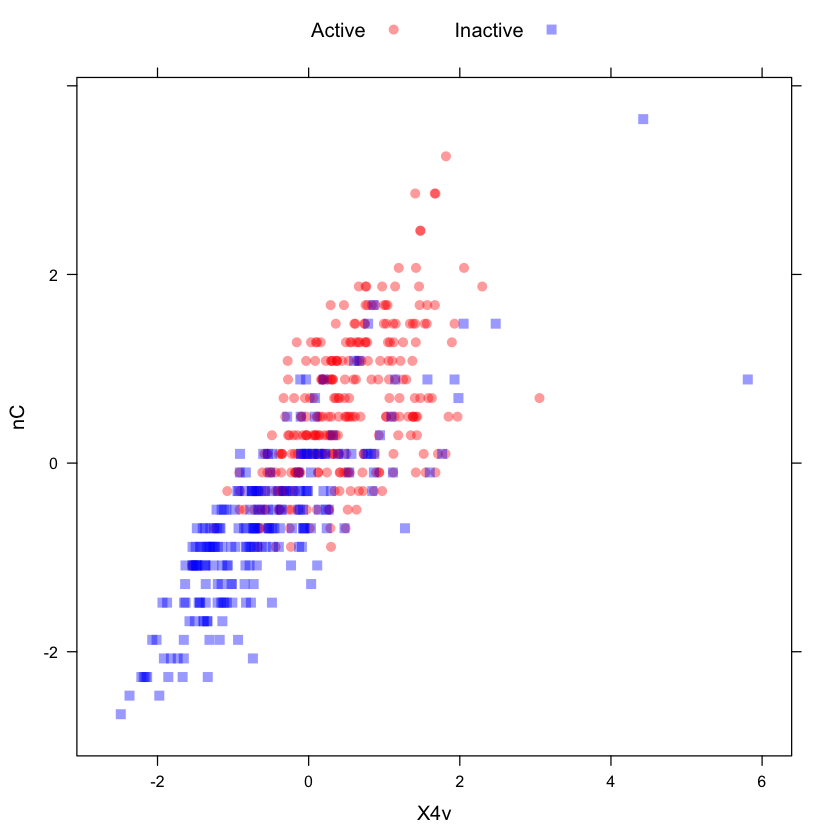

In [19]:
plotSubset <- data.frame(scale(mdrrDescr[, c("nC", "X4v")])) 
xyplot(nC ~ X4v,
       data = plotSubset,
       groups = mdrrClass, 
       auto.key = list(columns = 2))  

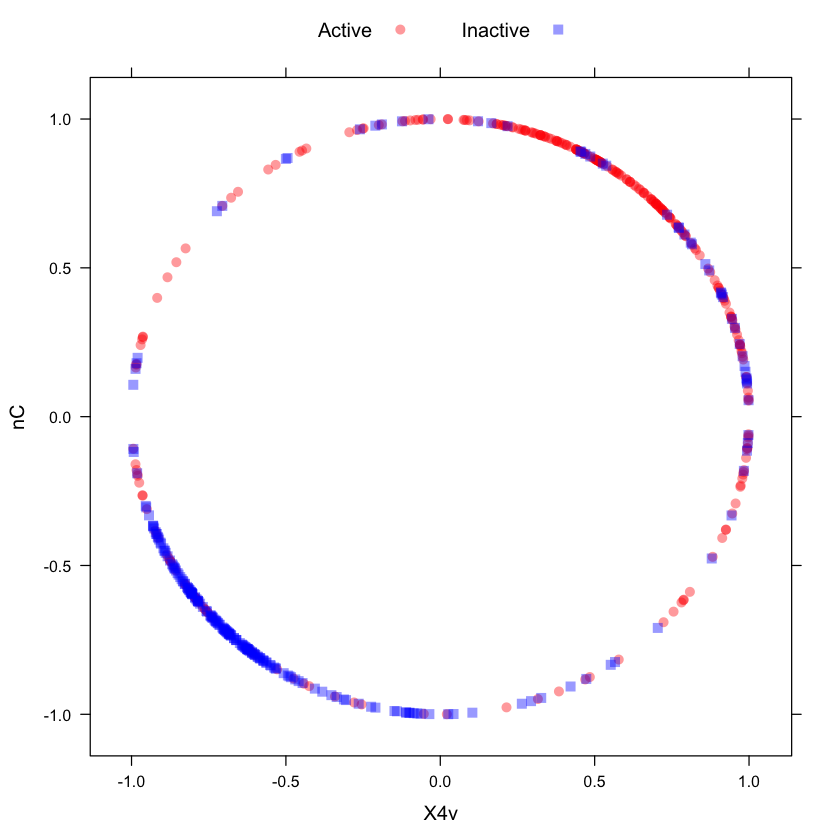

In [20]:
transformed <- spatialSign(plotSubset)
transformed <- as.data.frame(transformed)
xyplot(nC ~ X4v, 
       data = transformed, 
       groups = mdrrClass, 
       auto.key = list(columns = 2)) 

In [23]:
library(e1071)
preProcValues2 <- preProcess(training, method = "BoxCox")
trainBC <- predict(preProcValues2, training)
testBC <- predict(preProcValues2, test)
preProcValues2

Created from 264 samples and 31 variables

Pre-processing:
  - Box-Cox transformation (31)
  - ignored (0)

Lambda estimates for Box-Cox transformation:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.0000 -0.2000  0.3000  0.4097  1.7000  2.0000 


# Putting It All Together

In [29]:
library(AppliedPredictiveModeling)
data(schedulingData)
str(schedulingData)
head(schedulingData)

'data.frame':	4331 obs. of  8 variables:
 $ Protocol   : Factor w/ 14 levels "A","C","D","E",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Compounds  : num  997 97 101 93 100 100 105 98 101 95 ...
 $ InputFields: num  137 103 75 76 82 82 88 95 91 92 ...
 $ Iterations : num  20 20 10 20 20 20 20 20 20 20 ...
 $ NumPending : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Hour       : num  14 13.8 13.8 10.1 10.4 ...
 $ Day        : Factor w/ 7 levels "Mon","Tue","Wed",..: 2 2 4 5 5 3 5 5 5 3 ...
 $ Class      : Factor w/ 4 levels "VF","F","M","L": 2 1 1 1 1 1 1 1 1 1 ...


Protocol,Compounds,InputFields,Iterations,NumPending,Hour,Day,Class
E,997,137,20,0,14.00000,Tue,F
E,97,103,20,0,13.81667,Tue,VF
E,101,75,10,0,13.85000,Thu,VF
E,93,76,20,0,10.10000,Fri,VF
E,100,82,20,0,10.36667,Fri,VF
E,100,82,20,0,16.53333,Wed,VF


In [25]:
pp_hpc <- preProcess(schedulingData[, -8], 
                     method = c("center", "scale", "b"))
pp_hpc

Created from 4331 samples and 7 variables

Pre-processing:
  - centered (5)
  - ignored (2)
  - scaled (5)
  - Yeo-Johnson transformation (5)

Lambda estimates for Yeo-Johnson transformation:
-0.08, -0.03, -1.05, -1.1, 1.44

In [26]:
transformed <- predict(pp_hpc, newdata = schedulingData[, -8])
head(transformed)

Protocol,Compounds,InputFields,Iterations,NumPending,Hour,Day
E,1.2289592,-0.6324580,-0.0615593,-0.554123,0.004586516,Tue
E,-0.6065826,-0.8120473,-0.0615593,-0.554123,-0.043733201,Tue
E,-0.5719534,-1.0131504,-2.7894869,-0.554123,-0.034967177,Thu
E,-0.6427737,-1.0047277,-0.0615593,-0.554123,-0.964170752,Fri
E,-0.5804713,-0.9564504,-0.0615593,-0.554123,-0.902085020,Fri
E,-0.5804713,-0.9564504,-0.0615593,-0.554123,0.698108782,Wed


In [27]:
mean(schedulingData$NumPending == 0)

[1] 0.7561764

In [28]:
mean(transformed$NumPending == 0)

[1] 0

In [30]:
pp_no_nzv <- preProcess(schedulingData[, -8], 
                        method = c("center", "scale", "YeoJohnson", "nzv"))
pp_no_nzv

Created from 4331 samples and 7 variables

Pre-processing:
  - centered (4)
  - ignored (2)
  - removed (1)
  - scaled (4)
  - Yeo-Johnson transformation (4)

Lambda estimates for Yeo-Johnson transformation:
-0.08, -0.03, -1.05, 1.44

In [31]:
predict(pp_no_nzv, newdata = schedulingData[1:6, -8])

Protocol,Compounds,InputFields,Iterations,Hour,Day
E,1.2289592,-0.6324580,-0.0615593,0.004586516,Tue
E,-0.6065826,-0.8120473,-0.0615593,-0.043733201,Tue
E,-0.5719534,-1.0131504,-2.7894869,-0.034967177,Thu
E,-0.6427737,-1.0047277,-0.0615593,-0.964170752,Fri
E,-0.5804713,-0.9564504,-0.0615593,-0.902085020,Fri
E,-0.5804713,-0.9564504,-0.0615593,0.698108782,Wed


# Class Distance Calculations

```r
inTrain <- sample(seq(along = mdrrClass), length(mdrrClass)/2)

training <- filteredDescr[inTrain,]
test <- filteredDescr[-inTrain,]

trainMDRR <- mdrrClass[inTrain]
testMDRR <- mdrrClass[-inTrain]

preProcValues2 <- preProcess(training, method = "BoxCox")
trainBC <- predict(preProcValues2, training)

```

In [32]:
centroids <- classDist(trainBC, trainMDRR)
distances <- predict(centroids, testBC)
distances <- as.data.frame(distances)
head(distances)

,dist.Active,dist.Inactive
PROMETHAZINE,5.810607,4.098229
ACEPROMETAZINE,4.272003,4.169292
PYRATHIAZINE,4.570192,4.224053
THIORIDAZINE,4.548315,5.064125
MESORIDAZINE,4.621708,5.080362
SULFORIDAZINE,5.344699,5.145311


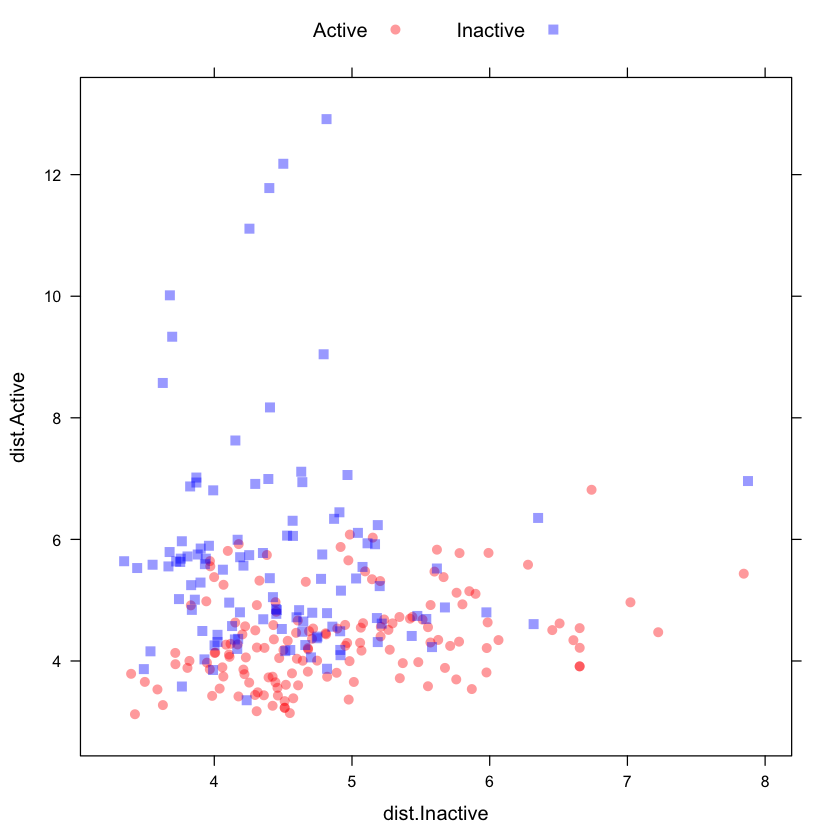

In [33]:
xyplot(dist.Active ~ dist.Inactive,
       data = distances, 
       groups = testMDRR, 
       auto.key = list(columns = 2))